In [1]:
import os
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import io

2022-07-14 11:37:26.508210: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [2]:
# input dimensions
in_dim = 8
do = 0.5
out_dim = 1
tolerance = 1e-8
start = np.random.randn(in_dim)

In [20]:
# original model
model_ = Sequential([
    tf.keras.layers.Dense(37, activation = 'sigmoid', input_shape = (8,)),
    tf.keras.layers.Dense(29, activation = 'sigmoid'),
    tf.keras.layers.Dense(1, activation = 'relu')
])

In [3]:
# define model (new )
model = Sequential()
model.add(Dense(19, activation='tanh', kernel_initializer='he_normal', input_shape=(8,)))
# tf.keras.layers.Dropout(0.5)
model.add(Dense(13, activation='elu', kernel_initializer='he_normal'))
# tf.keras.layers.Dropout(0.5)
model.add(Dense(17, activation='tanh', kernel_initializer='he_normal'))
# tf.keras.layers.Dropout(0.5)
model.add(Dense(11, activation='exponential', kernel_initializer='he_normal'))
model.add(Dense(1, activation='relu'))

2022-07-14 11:37:31.291869: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-07-14 11:37:31.291917: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (neo11-Inspiron-5402): /proc/driver/nvidia/version does not exist
2022-07-14 11:37:31.299926: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 19)                171       
                                                                 
 dense_1 (Dense)             (None, 13)                260       
                                                                 
 dense_2 (Dense)             (None, 17)                238       
                                                                 
 dense_3 (Dense)             (None, 11)                198       
                                                                 
 dense_4 (Dense)             (None, 1)                 12        
                                                                 
Total params: 879
Trainable params: 879
Non-trainable params: 0
_________________________________________________________________


**Load data and begin tarining and testing**

In [7]:
# training data
path1 = '/home/neo11/Documents/APL405_SPA/train_data.csv'
data1 = pd.read_csv(path1)
data1 = data1.sample(frac =1)
d = data1.to_numpy()
y = d[:,0]
x = d[:,1:9]

In [8]:
# testing data
path2 = '/home/neo11/Documents/APL405_SPA/test_data.csv'
data2 = pd.read_csv(path2)
data2 = data2.sample(frac =1)
d1 = data2.to_numpy()
y1 = d1[:,0]
x1 = d1[:,1:9]

**trial 1**

In [13]:
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-2,
    decay_steps=100,
    decay_rate=0.9)
optimizer = keras.optimizers.Adam(learning_rate=lr_schedule)

In [14]:
model.compile(optimizer=optimizer, loss = 'MeanSquaredError', metrics = ['mae'])

In [ ]:
tfp.optimizer.lbfgs_minimize(
    value_and_gradients_function,
    initial_position,
    previous_optimizer_results=None,
    num_correction_pairs=10,
    tolerance=1e-08,
    x_tolerance=0,
    f_relative_tolerance=0,
    initial_inverse_hessian_estimate=None,
    max_iterations=50,
    parallel_iterations=1,
    stopping_condition=None,
    max_line_search_iterations=50,
    f_absolute_tolerance=0,
    name=None
)

In [ ]:
model.compile(optimizer,
              loss=tf.keras.losses.LogCosh(),
              metrics=['accuracy'])

**trail 2**

In [ ]:
from tensorflow_probability import substrates
# from tensorflow_probability.google import staging  # DisableOnExport
# from tensorflow_probability.google import tfp_google  # DisableOnExport
from tensorflow_probability.python import *  # pylint: disable=wildcard-import
from tensorflow_probability.python.version import __version__

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss=tf.keras.losses.MeanSquaredError(),
              metrics=['accuracy'])

**training the model**

Mean sqaured log error, squared mean of the log values.

Epoch 1/10000
3/3 [==============================] - 0s 3ms/step - loss: 6112.2808 - mae: 63.8599
Epoch 2/10000
3/3 [==============================] - 0s 4ms/step - loss: 6114.9229 - mae: 63.8575
Epoch 3/10000
3/3 [==============================] - 0s 4ms/step - loss: 6115.0146 - mae: 63.8577
Epoch 4/10000
3/3 [==============================] - 0s 5ms/step - loss: 6111.9536 - mae: 63.8718
Epoch 5/10000
3/3 [==============================] - 0s 4ms/step - loss: 6112.4946 - mae: 63.8829
Epoch 6/10000
3/3 [==============================] - 0s 4ms/step - loss: 6117.3169 - mae: 63.8824
Epoch 7/10000
3/3 [==============================] - 0s 4ms/step - loss: 6113.5933 - mae: 63.8529
Epoch 8/10000
3/3 [==============================] - 0s 3ms/step - loss: 6112.6138 - mae: 63.8615
Epoch 9/10000
3/3 [==============================] - 0s 4ms/step - loss: 6113.2139 - mae: 63.8764
Epoch 10/10000
3/3 [==============================] - 0s 5ms/step - loss: 6113.5264 - mae: 63.9130
Epoch 11/10000
3/3 

3/3 [==============================] - 0s 4ms/step - loss: 6112.5049 - mae: 63.8624
Epoch 166/10000
3/3 [==============================] - 0s 4ms/step - loss: 6111.8130 - mae: 63.8551
Epoch 167/10000
3/3 [==============================] - 0s 3ms/step - loss: 6112.2686 - mae: 63.8594
Epoch 168/10000
3/3 [==============================] - 0s 4ms/step - loss: 6111.6763 - mae: 63.8581
Epoch 169/10000
3/3 [==============================] - 0s 3ms/step - loss: 6112.7158 - mae: 63.8602
Epoch 170/10000
3/3 [==============================] - 0s 5ms/step - loss: 6112.4097 - mae: 63.8568
Epoch 171/10000
3/3 [==============================] - 0s 4ms/step - loss: 6112.1724 - mae: 63.8488
Epoch 172/10000
3/3 [==============================] - 0s 4ms/step - loss: 6112.3208 - mae: 63.8493
Epoch 173/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.8535 - mae: 63.8529
Epoch 174/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.8779 - mae: 63.8659
Epoch 175/10000


3/3 [==============================] - 0s 4ms/step - loss: 6112.0396 - mae: 63.9274
Epoch 248/10000
3/3 [==============================] - 0s 4ms/step - loss: 6112.8320 - mae: 63.9221
Epoch 249/10000
3/3 [==============================] - 0s 4ms/step - loss: 6112.2793 - mae: 63.9103
Epoch 250/10000
3/3 [==============================] - 0s 5ms/step - loss: 6111.5562 - mae: 63.9044
Epoch 251/10000
3/3 [==============================] - 0s 5ms/step - loss: 6112.0474 - mae: 63.9149
Epoch 252/10000
3/3 [==============================] - 0s 4ms/step - loss: 6112.9243 - mae: 63.9275
Epoch 253/10000
3/3 [==============================] - 0s 5ms/step - loss: 6111.6074 - mae: 63.9216
Epoch 254/10000
3/3 [==============================] - 0s 4ms/step - loss: 6111.7808 - mae: 63.9159
Epoch 255/10000
3/3 [==============================] - 0s 4ms/step - loss: 6111.6001 - mae: 63.9086
Epoch 256/10000
3/3 [==============================] - 0s 5ms/step - loss: 6112.8022 - mae: 63.9045
Epoch 257/10000


3/3 [==============================] - 0s 4ms/step - loss: 6111.8418 - mae: 63.9232
Epoch 330/10000
3/3 [==============================] - 0s 4ms/step - loss: 6112.6992 - mae: 63.9283
Epoch 331/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.4995 - mae: 63.9203
Epoch 332/10000
3/3 [==============================] - 0s 4ms/step - loss: 6113.3350 - mae: 63.9135
Epoch 333/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.9097 - mae: 63.9004
Epoch 334/10000
3/3 [==============================] - 0s 4ms/step - loss: 6111.5933 - mae: 63.8960
Epoch 335/10000
3/3 [==============================] - 0s 4ms/step - loss: 6111.7417 - mae: 63.8984
Epoch 336/10000
3/3 [==============================] - 0s 4ms/step - loss: 6112.2520 - mae: 63.9056
Epoch 337/10000
3/3 [==============================] - 0s 5ms/step - loss: 6111.4839 - mae: 63.9031
Epoch 338/10000
3/3 [==============================] - 0s 5ms/step - loss: 6111.6250 - mae: 63.9000
Epoch 339/10000


3/3 [==============================] - 0s 4ms/step - loss: 6111.6763 - mae: 63.9012
Epoch 412/10000
3/3 [==============================] - 0s 4ms/step - loss: 6111.9307 - mae: 63.9062
Epoch 413/10000
3/3 [==============================] - 0s 4ms/step - loss: 6111.4463 - mae: 63.9066
Epoch 414/10000
3/3 [==============================] - 0s 4ms/step - loss: 6111.5327 - mae: 63.9077
Epoch 415/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.7529 - mae: 63.9128
Epoch 416/10000
3/3 [==============================] - 0s 5ms/step - loss: 6111.7646 - mae: 63.9161
Epoch 417/10000
3/3 [==============================] - 0s 4ms/step - loss: 6112.0308 - mae: 63.9230
Epoch 418/10000
3/3 [==============================] - 0s 5ms/step - loss: 6111.6597 - mae: 63.9242
Epoch 419/10000
3/3 [==============================] - 0s 4ms/step - loss: 6111.6279 - mae: 63.9210
Epoch 420/10000
3/3 [==============================] - 0s 4ms/step - loss: 6111.7041 - mae: 63.9162
Epoch 421/10000


3/3 [==============================] - 0s 4ms/step - loss: 6111.4243 - mae: 63.8976
Epoch 494/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.5430 - mae: 63.8988
Epoch 495/10000
3/3 [==============================] - 0s 4ms/step - loss: 6111.5474 - mae: 63.8975
Epoch 496/10000
3/3 [==============================] - 0s 4ms/step - loss: 6111.7002 - mae: 63.8988
Epoch 497/10000
3/3 [==============================] - 0s 4ms/step - loss: 6111.7290 - mae: 63.8955
Epoch 498/10000
3/3 [==============================] - 0s 4ms/step - loss: 6111.4429 - mae: 63.8926
Epoch 499/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.6514 - mae: 63.8910
Epoch 500/10000
3/3 [==============================] - 0s 6ms/step - loss: 6111.6284 - mae: 63.8858
Epoch 501/10000
3/3 [==============================] - 0s 6ms/step - loss: 6111.4985 - mae: 63.8829
Epoch 502/10000
3/3 [==============================] - 0s 5ms/step - loss: 6111.5391 - mae: 63.8818
Epoch 503/10000


3/3 [==============================] - 0s 4ms/step - loss: 6111.4058 - mae: 63.8826
Epoch 576/10000
3/3 [==============================] - 0s 4ms/step - loss: 6111.4658 - mae: 63.8779
Epoch 577/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.3516 - mae: 63.8755
Epoch 578/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.4731 - mae: 63.8733
Epoch 579/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.6729 - mae: 63.8715
Epoch 580/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.5425 - mae: 63.8702
Epoch 581/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.5640 - mae: 63.8719
Epoch 582/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.4673 - mae: 63.8700
Epoch 583/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.5137 - mae: 63.8684
Epoch 584/10000
3/3 [==============================] - 0s 4ms/step - loss: 6111.5210 - mae: 63.8694
Epoch 585/10000


3/3 [==============================] - 0s 4ms/step - loss: 6111.3701 - mae: 63.8850
Epoch 658/10000
3/3 [==============================] - 0s 4ms/step - loss: 6111.3804 - mae: 63.8862
Epoch 659/10000
3/3 [==============================] - 0s 4ms/step - loss: 6111.5742 - mae: 63.8883
Epoch 660/10000
3/3 [==============================] - 0s 4ms/step - loss: 6111.4751 - mae: 63.8889
Epoch 661/10000
3/3 [==============================] - 0s 4ms/step - loss: 6111.5332 - mae: 63.8873
Epoch 662/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.5137 - mae: 63.8875
Epoch 663/10000
3/3 [==============================] - 0s 4ms/step - loss: 6111.4214 - mae: 63.8886
Epoch 664/10000
3/3 [==============================] - 0s 4ms/step - loss: 6111.4683 - mae: 63.8887
Epoch 665/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.5034 - mae: 63.8867
Epoch 666/10000
3/3 [==============================] - 0s 4ms/step - loss: 6111.5630 - mae: 63.8883
Epoch 667/10000


3/3 [==============================] - 0s 4ms/step - loss: 6111.5430 - mae: 63.8920
Epoch 740/10000
3/3 [==============================] - 0s 4ms/step - loss: 6111.4346 - mae: 63.8917
Epoch 741/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.3486 - mae: 63.8906
Epoch 742/10000
3/3 [==============================] - 0s 4ms/step - loss: 6111.3389 - mae: 63.8892
Epoch 743/10000
3/3 [==============================] - 0s 4ms/step - loss: 6111.3716 - mae: 63.8896
Epoch 744/10000
3/3 [==============================] - 0s 4ms/step - loss: 6111.3384 - mae: 63.8899
Epoch 745/10000
3/3 [==============================] - 0s 4ms/step - loss: 6111.4189 - mae: 63.8892
Epoch 746/10000
3/3 [==============================] - 0s 5ms/step - loss: 6111.3574 - mae: 63.8876
Epoch 747/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.7437 - mae: 63.8884
Epoch 748/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.4082 - mae: 63.8851
Epoch 749/10000


3/3 [==============================] - 0s 3ms/step - loss: 6111.3984 - mae: 63.8772
Epoch 822/10000
3/3 [==============================] - 0s 4ms/step - loss: 6111.3472 - mae: 63.8780
Epoch 823/10000
3/3 [==============================] - 0s 4ms/step - loss: 6111.3311 - mae: 63.8791
Epoch 824/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.3613 - mae: 63.8808
Epoch 825/10000
3/3 [==============================] - 0s 4ms/step - loss: 6111.3687 - mae: 63.8822
Epoch 826/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.4082 - mae: 63.8833
Epoch 827/10000
3/3 [==============================] - 0s 4ms/step - loss: 6111.3662 - mae: 63.8847
Epoch 828/10000
3/3 [==============================] - 0s 4ms/step - loss: 6111.3799 - mae: 63.8863
Epoch 829/10000
3/3 [==============================] - 0s 4ms/step - loss: 6111.3320 - mae: 63.8869
Epoch 830/10000
3/3 [==============================] - 0s 4ms/step - loss: 6111.4980 - mae: 63.8869
Epoch 831/10000


3/3 [==============================] - 0s 4ms/step - loss: 6111.3618 - mae: 63.9017
Epoch 904/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.3423 - mae: 63.9023
Epoch 905/10000
3/3 [==============================] - 0s 4ms/step - loss: 6111.3350 - mae: 63.9029
Epoch 906/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.3638 - mae: 63.9037
Epoch 907/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.4277 - mae: 63.9050
Epoch 908/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.4395 - mae: 63.9045
Epoch 909/10000
3/3 [==============================] - 0s 4ms/step - loss: 6111.3599 - mae: 63.9040
Epoch 910/10000
3/3 [==============================] - 0s 4ms/step - loss: 6111.3359 - mae: 63.9045
Epoch 911/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.5645 - mae: 63.9056
Epoch 912/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.4854 - mae: 63.9063
Epoch 913/10000


3/3 [==============================] - 0s 4ms/step - loss: 6111.3667 - mae: 63.8843
Epoch 986/10000
3/3 [==============================] - 0s 4ms/step - loss: 6111.3276 - mae: 63.8843
Epoch 987/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.3359 - mae: 63.8841
Epoch 988/10000
3/3 [==============================] - 0s 4ms/step - loss: 6111.3154 - mae: 63.8835
Epoch 989/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.4062 - mae: 63.8835
Epoch 990/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.5225 - mae: 63.8848
Epoch 991/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.3193 - mae: 63.8841
Epoch 992/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.3208 - mae: 63.8837
Epoch 993/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.3193 - mae: 63.8829
Epoch 994/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.4429 - mae: 63.8819
Epoch 995/10000


3/3 [==============================] - 0s 4ms/step - loss: 6111.2930 - mae: 63.8725
Epoch 1148/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2915 - mae: 63.8727
Epoch 1149/10000
3/3 [==============================] - 0s 4ms/step - loss: 6111.3481 - mae: 63.8734
Epoch 1150/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.3667 - mae: 63.8735
Epoch 1151/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.3213 - mae: 63.8727
Epoch 1152/10000
3/3 [==============================] - 0s 4ms/step - loss: 6111.3682 - mae: 63.8733
Epoch 1153/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2900 - mae: 63.8729
Epoch 1154/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.3667 - mae: 63.8725
Epoch 1155/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2988 - mae: 63.8717
Epoch 1156/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.3037 - mae: 63.8719
Epoch 1

3/3 [==============================] - 0s 3ms/step - loss: 6111.3008 - mae: 63.8716
Epoch 1310/10000
3/3 [==============================] - 0s 4ms/step - loss: 6111.3047 - mae: 63.8714
Epoch 1311/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2900 - mae: 63.8710
Epoch 1312/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2988 - mae: 63.8707
Epoch 1313/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.3130 - mae: 63.8708
Epoch 1314/10000
3/3 [==============================] - 0s 4ms/step - loss: 6111.2930 - mae: 63.8708
Epoch 1315/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2949 - mae: 63.8706
Epoch 1316/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2930 - mae: 63.8705
Epoch 1317/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2949 - mae: 63.8705
Epoch 1318/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.3057 - mae: 63.8705
Epoch 1

3/3 [==============================] - 0s 4ms/step - loss: 6111.2847 - mae: 63.8670
Epoch 1472/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2876 - mae: 63.8670
Epoch 1473/10000
3/3 [==============================] - 0s 4ms/step - loss: 6111.2876 - mae: 63.8669
Epoch 1474/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2988 - mae: 63.8668
Epoch 1475/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2910 - mae: 63.8667
Epoch 1476/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2876 - mae: 63.8668
Epoch 1477/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.3042 - mae: 63.8670
Epoch 1478/10000
3/3 [==============================] - 0s 4ms/step - loss: 6111.2896 - mae: 63.8671
Epoch 1479/10000
3/3 [==============================] - 0s 4ms/step - loss: 6111.3027 - mae: 63.8671
Epoch 1480/10000
3/3 [==============================] - 0s 5ms/step - loss: 6111.2876 - mae: 63.8670
Epoch 1

3/3 [==============================] - 0s 3ms/step - loss: 6111.2832 - mae: 63.8687
Epoch 1634/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2876 - mae: 63.8689
Epoch 1635/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2847 - mae: 63.8691
Epoch 1636/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2900 - mae: 63.8692
Epoch 1637/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2944 - mae: 63.8694
Epoch 1638/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2930 - mae: 63.8695
Epoch 1639/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2861 - mae: 63.8694
Epoch 1640/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2896 - mae: 63.8693
Epoch 1641/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2910 - mae: 63.8692
Epoch 1642/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2891 - mae: 63.8692
Epoch 1

3/3 [==============================] - 0s 3ms/step - loss: 6111.2832 - mae: 63.8681
Epoch 1796/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2876 - mae: 63.8681
Epoch 1797/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2817 - mae: 63.8680
Epoch 1798/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2876 - mae: 63.8682
Epoch 1799/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2832 - mae: 63.8682
Epoch 1800/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2817 - mae: 63.8682
Epoch 1801/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2817 - mae: 63.8682
Epoch 1802/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.3037 - mae: 63.8684
Epoch 1803/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2827 - mae: 63.8684
Epoch 1804/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2827 - mae: 63.8684
Epoch 1

3/3 [==============================] - 0s 3ms/step - loss: 6111.2798 - mae: 63.8679
Epoch 1958/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2808 - mae: 63.8679
Epoch 1959/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2847 - mae: 63.8679
Epoch 1960/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2808 - mae: 63.8679
Epoch 1961/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2798 - mae: 63.8679
Epoch 1962/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2798 - mae: 63.8679
Epoch 1963/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2808 - mae: 63.8680
Epoch 1964/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2847 - mae: 63.8680
Epoch 1965/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2812 - mae: 63.8680
Epoch 1966/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2812 - mae: 63.8680
Epoch 1

3/3 [==============================] - 0s 3ms/step - loss: 6111.2793 - mae: 63.8691
Epoch 2120/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2783 - mae: 63.8691
Epoch 2121/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2793 - mae: 63.8691
Epoch 2122/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2798 - mae: 63.8691
Epoch 2123/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2783 - mae: 63.8691
Epoch 2124/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2812 - mae: 63.8691
Epoch 2125/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2847 - mae: 63.8691
Epoch 2126/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2808 - mae: 63.8691
Epoch 2127/10000
3/3 [==============================] - 0s 4ms/step - loss: 6111.2783 - mae: 63.8691
Epoch 2128/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2783 - mae: 63.8691
Epoch 2

3/3 [==============================] - 0s 3ms/step - loss: 6111.2793 - mae: 63.8691
Epoch 2282/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2783 - mae: 63.8691
Epoch 2283/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2793 - mae: 63.8691
Epoch 2284/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2793 - mae: 63.8691
Epoch 2285/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2812 - mae: 63.8691
Epoch 2286/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8690
Epoch 2287/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2783 - mae: 63.8690
Epoch 2288/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2793 - mae: 63.8690
Epoch 2289/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2783 - mae: 63.8690
Epoch 2290/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8690
Epoch 2

3/3 [==============================] - 0s 3ms/step - loss: 6111.2783 - mae: 63.8691
Epoch 2444/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2783 - mae: 63.8691
Epoch 2445/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8691
Epoch 2446/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8691
Epoch 2447/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8691
Epoch 2448/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2793 - mae: 63.8691
Epoch 2449/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2793 - mae: 63.8691
Epoch 2450/10000
3/3 [==============================] - 0s 4ms/step - loss: 6111.2778 - mae: 63.8691
Epoch 2451/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8691
Epoch 2452/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2783 - mae: 63.8691
Epoch 2

3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 2606/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 2607/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 2608/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 2609/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 2610/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2783 - mae: 63.8692
Epoch 2611/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2793 - mae: 63.8692
Epoch 2612/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2783 - mae: 63.8692
Epoch 2613/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2783 - mae: 63.8692
Epoch 2614/10000
3/3 [==============================] - 0s 4ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 2

3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 2768/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 2769/10000
3/3 [==============================] - 0s 4ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 2770/10000
3/3 [==============================] - 0s 4ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 2771/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 2772/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 2773/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 2774/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 2775/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 2776/10000
3/3 [==============================] - 0s 4ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 2

3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 2930/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2769 - mae: 63.8692
Epoch 2931/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 2932/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 2933/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2769 - mae: 63.8692
Epoch 2934/10000
3/3 [==============================] - 0s 4ms/step - loss: 6111.2769 - mae: 63.8692
Epoch 2935/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 2936/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2769 - mae: 63.8692
Epoch 2937/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2769 - mae: 63.8692
Epoch 2938/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 2

3/3 [==============================] - 0s 3ms/step - loss: 6111.2769 - mae: 63.8692
Epoch 3092/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2769 - mae: 63.8692
Epoch 3093/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 3094/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 3095/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 3096/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 3097/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 3098/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2769 - mae: 63.8692
Epoch 3099/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2769 - mae: 63.8692
Epoch 3100/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 3

3/3 [==============================] - 0s 3ms/step - loss: 6111.2769 - mae: 63.8692
Epoch 3254/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 3255/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 3256/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2769 - mae: 63.8692
Epoch 3257/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 3258/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 3259/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 3260/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 3261/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2769 - mae: 63.8692
Epoch 3262/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 3

3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 3416/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 3417/10000
3/3 [==============================] - 0s 4ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 3418/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2769 - mae: 63.8692
Epoch 3419/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 3420/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 3421/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 3422/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 3423/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2769 - mae: 63.8692
Epoch 3424/10000
3/3 [==============================] - 0s 4ms/step - loss: 6111.2769 - mae: 63.8692
Epoch 3

3/3 [==============================] - 0s 3ms/step - loss: 6111.2769 - mae: 63.8692
Epoch 3578/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2769 - mae: 63.8692
Epoch 3579/10000
3/3 [==============================] - 0s 4ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 3580/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 3581/10000
3/3 [==============================] - 0s 4ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 3582/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 3583/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 3584/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2769 - mae: 63.8692
Epoch 3585/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 3586/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 3

3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 3740/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 3741/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 3742/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2769 - mae: 63.8692
Epoch 3743/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 3744/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 3745/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 3746/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 3747/10000
3/3 [==============================] - 0s 4ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 3748/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 3

3/3 [==============================] - 0s 9ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 3902/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2769 - mae: 63.8692
Epoch 3903/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 3904/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 3905/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 3906/10000
3/3 [==============================] - 0s 2ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 3907/10000
3/3 [==============================] - 0s 2ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 3908/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 3909/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2769 - mae: 63.8692
Epoch 3910/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 3

3/3 [==============================] - 0s 3ms/step - loss: 6111.2769 - mae: 63.8692
Epoch 4064/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 4065/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2769 - mae: 63.8692
Epoch 4066/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2769 - mae: 63.8692
Epoch 4067/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2769 - mae: 63.8692
Epoch 4068/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 4069/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 4070/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 4071/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 4072/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 4

3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 4226/10000
3/3 [==============================] - 0s 7ms/step - loss: 6111.2769 - mae: 63.8692
Epoch 4227/10000
3/3 [==============================] - 0s 4ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 4228/10000
3/3 [==============================] - 0s 4ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 4229/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 4230/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 4231/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 4232/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 4233/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 4234/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 4

3/3 [==============================] - 0s 4ms/step - loss: 6111.2769 - mae: 63.8692
Epoch 4388/10000
3/3 [==============================] - 0s 4ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 4389/10000
3/3 [==============================] - 0s 4ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 4390/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 4391/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 4392/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2769 - mae: 63.8692
Epoch 4393/10000
3/3 [==============================] - 0s 4ms/step - loss: 6111.2769 - mae: 63.8692
Epoch 4394/10000
3/3 [==============================] - 0s 4ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 4395/10000
3/3 [==============================] - 0s 4ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 4396/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 4

3/3 [==============================] - 0s 4ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 4550/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2769 - mae: 63.8692
Epoch 4551/10000
3/3 [==============================] - 0s 5ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 4552/10000
3/3 [==============================] - 0s 5ms/step - loss: 6111.2769 - mae: 63.8692
Epoch 4553/10000
3/3 [==============================] - 0s 4ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 4554/10000
3/3 [==============================] - 0s 5ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 4555/10000
3/3 [==============================] - 0s 5ms/step - loss: 6111.2769 - mae: 63.8692
Epoch 4556/10000
3/3 [==============================] - 0s 5ms/step - loss: 6111.2769 - mae: 63.8692
Epoch 4557/10000
3/3 [==============================] - 0s 5ms/step - loss: 6111.2769 - mae: 63.8692
Epoch 4558/10000
3/3 [==============================] - 0s 4ms/step - loss: 6111.2769 - mae: 63.8692
Epoch 4

3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 4712/10000
3/3 [==============================] - 0s 4ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 4713/10000
3/3 [==============================] - 0s 4ms/step - loss: 6111.2769 - mae: 63.8692
Epoch 4714/10000
3/3 [==============================] - 0s 4ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 4715/10000
3/3 [==============================] - 0s 10ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 4716/10000
3/3 [==============================] - 0s 5ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 4717/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 4718/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 4719/10000
3/3 [==============================] - 0s 4ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 4720/10000
3/3 [==============================] - 0s 4ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 

3/3 [==============================] - 0s 3ms/step - loss: 6111.2769 - mae: 63.8692
Epoch 4874/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 4875/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 4876/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 4877/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 4878/10000
3/3 [==============================] - 0s 4ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 4879/10000
3/3 [==============================] - 0s 4ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 4880/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 4881/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2769 - mae: 63.8692
Epoch 4882/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 4

3/3 [==============================] - 0s 4ms/step - loss: 6111.2769 - mae: 63.8692
Epoch 5036/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2769 - mae: 63.8692
Epoch 5037/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 5038/10000
3/3 [==============================] - 0s 4ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 5039/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2769 - mae: 63.8692
Epoch 5040/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 5041/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2769 - mae: 63.8692
Epoch 5042/10000
3/3 [==============================] - 0s 4ms/step - loss: 6111.2769 - mae: 63.8692
Epoch 5043/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2769 - mae: 63.8692
Epoch 5044/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 5

3/3 [==============================] - 0s 4ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 5198/10000
3/3 [==============================] - 0s 4ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 5199/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2769 - mae: 63.8692
Epoch 5200/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 5201/10000
3/3 [==============================] - 0s 4ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 5202/10000
3/3 [==============================] - 0s 4ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 5203/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 5204/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 5205/10000
3/3 [==============================] - 0s 4ms/step - loss: 6111.2769 - mae: 63.8692
Epoch 5206/10000
3/3 [==============================] - 0s 4ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 5

3/3 [==============================] - 0s 4ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 5360/10000
3/3 [==============================] - 0s 4ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 5361/10000
3/3 [==============================] - 0s 5ms/step - loss: 6111.2769 - mae: 63.8692
Epoch 5362/10000
3/3 [==============================] - 0s 4ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 5363/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 5364/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2769 - mae: 63.8692
Epoch 5365/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2769 - mae: 63.8692
Epoch 5366/10000
3/3 [==============================] - 0s 4ms/step - loss: 6111.2769 - mae: 63.8692
Epoch 5367/10000
3/3 [==============================] - 0s 4ms/step - loss: 6111.2769 - mae: 63.8692
Epoch 5368/10000
3/3 [==============================] - 0s 4ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 5

3/3 [==============================] - 0s 4ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 5522/10000
3/3 [==============================] - 0s 4ms/step - loss: 6111.2769 - mae: 63.8692
Epoch 5523/10000
3/3 [==============================] - 0s 4ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 5524/10000
3/3 [==============================] - 0s 4ms/step - loss: 6111.2769 - mae: 63.8692
Epoch 5525/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2769 - mae: 63.8692
Epoch 5526/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2769 - mae: 63.8692
Epoch 5527/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2769 - mae: 63.8692
Epoch 5528/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2769 - mae: 63.8692
Epoch 5529/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 5530/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 5

3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 5684/10000
3/3 [==============================] - 0s 4ms/step - loss: 6111.2769 - mae: 63.8692
Epoch 5685/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 5686/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 5687/10000
3/3 [==============================] - 0s 4ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 5688/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 5689/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 5690/10000
3/3 [==============================] - 0s 4ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 5691/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2769 - mae: 63.8692
Epoch 5692/10000
3/3 [==============================] - 0s 4ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 5

3/3 [==============================] - 0s 4ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 5846/10000
3/3 [==============================] - 0s 4ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 5847/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2769 - mae: 63.8692
Epoch 5848/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 5849/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 5850/10000
3/3 [==============================] - 0s 4ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 5851/10000
3/3 [==============================] - 0s 4ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 5852/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 5853/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 5854/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 5

3/3 [==============================] - 0s 4ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 6008/10000
3/3 [==============================] - 0s 4ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 6009/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 6010/10000
3/3 [==============================] - 0s 4ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 6011/10000
3/3 [==============================] - 0s 4ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 6012/10000
3/3 [==============================] - 0s 4ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 6013/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 6014/10000
3/3 [==============================] - 0s 4ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 6015/10000
3/3 [==============================] - 0s 4ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 6016/10000
3/3 [==============================] - 0s 4ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 6

3/3 [==============================] - 0s 6ms/step - loss: 6111.2769 - mae: 63.8692
Epoch 6170/10000
3/3 [==============================] - 0s 4ms/step - loss: 6111.2769 - mae: 63.8692
Epoch 6171/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 6172/10000
3/3 [==============================] - 0s 4ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 6173/10000
3/3 [==============================] - 0s 4ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 6174/10000
3/3 [==============================] - 0s 4ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 6175/10000
3/3 [==============================] - 0s 4ms/step - loss: 6111.2769 - mae: 63.8692
Epoch 6176/10000
3/3 [==============================] - 0s 4ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 6177/10000
3/3 [==============================] - 0s 4ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 6178/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2769 - mae: 63.8692
Epoch 6

3/3 [==============================] - 0s 8ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 6332/10000
3/3 [==============================] - 0s 4ms/step - loss: 6111.2769 - mae: 63.8692
Epoch 6333/10000
3/3 [==============================] - 0s 4ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 6334/10000
3/3 [==============================] - 0s 4ms/step - loss: 6111.2769 - mae: 63.8692
Epoch 6335/10000
3/3 [==============================] - 0s 4ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 6336/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 6337/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2769 - mae: 63.8692
Epoch 6338/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 6339/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 6340/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2769 - mae: 63.8692
Epoch 6

3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 6494/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2769 - mae: 63.8692
Epoch 6495/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 6496/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 6497/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2769 - mae: 63.8692
Epoch 6498/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2769 - mae: 63.8692
Epoch 6499/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2769 - mae: 63.8692
Epoch 6500/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 6501/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 6502/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2769 - mae: 63.8692
Epoch 6

3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 6656/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 6657/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 6658/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 6659/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 6660/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 6661/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 6662/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2769 - mae: 63.8692
Epoch 6663/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 6664/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 6

3/3 [==============================] - 0s 3ms/step - loss: 6111.2769 - mae: 63.8692
Epoch 6818/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 6819/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2769 - mae: 63.8692
Epoch 6820/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 6821/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2769 - mae: 63.8692
Epoch 6822/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2769 - mae: 63.8692
Epoch 6823/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2769 - mae: 63.8692
Epoch 6824/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2769 - mae: 63.8692
Epoch 6825/10000
3/3 [==============================] - 0s 4ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 6826/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 6

3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 6980/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 6981/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 6982/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 6983/10000
3/3 [==============================] - 0s 5ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 6984/10000
3/3 [==============================] - 0s 4ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 6985/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 6986/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 6987/10000
3/3 [==============================] - 0s 4ms/step - loss: 6111.2769 - mae: 63.8692
Epoch 6988/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2769 - mae: 63.8692
Epoch 6

3/3 [==============================] - 0s 3ms/step - loss: 6111.2769 - mae: 63.8692
Epoch 7142/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 7143/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2769 - mae: 63.8692
Epoch 7144/10000
3/3 [==============================] - 0s 4ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 7145/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2769 - mae: 63.8692
Epoch 7146/10000
3/3 [==============================] - 0s 4ms/step - loss: 6111.2769 - mae: 63.8692
Epoch 7147/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 7148/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2769 - mae: 63.8692
Epoch 7149/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2769 - mae: 63.8692
Epoch 7150/10000
3/3 [==============================] - 0s 4ms/step - loss: 6111.2769 - mae: 63.8692
Epoch 7

3/3 [==============================] - 0s 4ms/step - loss: 6111.2769 - mae: 63.8692
Epoch 7304/10000
3/3 [==============================] - 0s 4ms/step - loss: 6111.2769 - mae: 63.8692
Epoch 7305/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 7306/10000
3/3 [==============================] - 0s 4ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 7307/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2769 - mae: 63.8692
Epoch 7308/10000
3/3 [==============================] - 0s 4ms/step - loss: 6111.2769 - mae: 63.8692
Epoch 7309/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2769 - mae: 63.8692
Epoch 7310/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2769 - mae: 63.8692
Epoch 7311/10000
3/3 [==============================] - 0s 4ms/step - loss: 6111.2769 - mae: 63.8692
Epoch 7312/10000
3/3 [==============================] - 0s 4ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 7

3/3 [==============================] - 0s 3ms/step - loss: 6111.2769 - mae: 63.8692
Epoch 7466/10000
3/3 [==============================] - 0s 4ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 7467/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 7468/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2769 - mae: 63.8692
Epoch 7469/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 7470/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 7471/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 7472/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2769 - mae: 63.8692
Epoch 7473/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 7474/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 7

3/3 [==============================] - 0s 3ms/step - loss: 6111.2769 - mae: 63.8692
Epoch 7628/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 7629/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2769 - mae: 63.8692
Epoch 7630/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2769 - mae: 63.8692
Epoch 7631/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2769 - mae: 63.8692
Epoch 7632/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 7633/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 7634/10000
3/3 [==============================] - 0s 4ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 7635/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2769 - mae: 63.8692
Epoch 7636/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 7

3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 7790/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 7791/10000
3/3 [==============================] - 0s 4ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 7792/10000
3/3 [==============================] - 0s 4ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 7793/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2769 - mae: 63.8692
Epoch 7794/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2769 - mae: 63.8692
Epoch 7795/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2769 - mae: 63.8692
Epoch 7796/10000
3/3 [==============================] - 0s 4ms/step - loss: 6111.2769 - mae: 63.8692
Epoch 7797/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 7798/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 7

3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 7952/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 7953/10000
3/3 [==============================] - 0s 4ms/step - loss: 6111.2769 - mae: 63.8692
Epoch 7954/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2769 - mae: 63.8692
Epoch 7955/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 7956/10000
3/3 [==============================] - 0s 4ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 7957/10000
3/3 [==============================] - 0s 4ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 7958/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2769 - mae: 63.8692
Epoch 7959/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 7960/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2769 - mae: 63.8692
Epoch 7

3/3 [==============================] - 0s 4ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 8114/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 8115/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 8116/10000
3/3 [==============================] - 0s 4ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 8117/10000
3/3 [==============================] - 0s 4ms/step - loss: 6111.2769 - mae: 63.8692
Epoch 8118/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 8119/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 8120/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 8121/10000
3/3 [==============================] - 0s 4ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 8122/10000
3/3 [==============================] - 0s 4ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 8

3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 8276/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 8277/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 8278/10000
3/3 [==============================] - 0s 4ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 8279/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 8280/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 8281/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 8282/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 8283/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 8284/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 8

3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 8438/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2769 - mae: 63.8692
Epoch 8439/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2769 - mae: 63.8692
Epoch 8440/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 8441/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2769 - mae: 63.8692
Epoch 8442/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 8443/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 8444/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2769 - mae: 63.8692
Epoch 8445/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 8446/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 8

3/3 [==============================] - 0s 4ms/step - loss: 6111.2769 - mae: 63.8692
Epoch 8600/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2769 - mae: 63.8692
Epoch 8601/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 8602/10000
3/3 [==============================] - 0s 4ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 8603/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2769 - mae: 63.8692
Epoch 8604/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 8605/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 8606/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 8607/10000
3/3 [==============================] - 0s 4ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 8608/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2769 - mae: 63.8692
Epoch 8

3/3 [==============================] - 0s 4ms/step - loss: 6111.2769 - mae: 63.8692
Epoch 8762/10000
3/3 [==============================] - 0s 4ms/step - loss: 6111.2769 - mae: 63.8692
Epoch 8763/10000
3/3 [==============================] - 0s 4ms/step - loss: 6111.2769 - mae: 63.8692
Epoch 8764/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 8765/10000
3/3 [==============================] - 0s 4ms/step - loss: 6111.2769 - mae: 63.8692
Epoch 8766/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 8767/10000
3/3 [==============================] - 0s 4ms/step - loss: 6111.2769 - mae: 63.8692
Epoch 8768/10000
3/3 [==============================] - 0s 4ms/step - loss: 6111.2769 - mae: 63.8692
Epoch 8769/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 8770/10000
3/3 [==============================] - 0s 4ms/step - loss: 6111.2769 - mae: 63.8692
Epoch 8

3/3 [==============================] - 0s 3ms/step - loss: 6111.2769 - mae: 63.8692
Epoch 8924/10000
3/3 [==============================] - 0s 4ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 8925/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2769 - mae: 63.8692
Epoch 8926/10000
3/3 [==============================] - 0s 4ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 8927/10000
3/3 [==============================] - 0s 4ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 8928/10000
3/3 [==============================] - 0s 4ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 8929/10000
3/3 [==============================] - 0s 4ms/step - loss: 6111.2769 - mae: 63.8692
Epoch 8930/10000
3/3 [==============================] - 0s 4ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 8931/10000
3/3 [==============================] - 0s 6ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 8932/10000
3/3 [==============================] - 0s 5ms/step - loss: 6111.2769 - mae: 63.8692
Epoch 8

3/3 [==============================] - 0s 4ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 9086/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2769 - mae: 63.8692
Epoch 9087/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2769 - mae: 63.8692
Epoch 9088/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 9089/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2769 - mae: 63.8692
Epoch 9090/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2769 - mae: 63.8692
Epoch 9091/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 9092/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 9093/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 9094/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2769 - mae: 63.8692
Epoch 9

3/3 [==============================] - 0s 4ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 9248/10000
3/3 [==============================] - 0s 4ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 9249/10000
3/3 [==============================] - 0s 4ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 9250/10000
3/3 [==============================] - 0s 5ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 9251/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 9252/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 9253/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 9254/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 9255/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2769 - mae: 63.8692
Epoch 9256/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2769 - mae: 63.8692
Epoch 9

3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 9410/10000
3/3 [==============================] - 0s 5ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 9411/10000
3/3 [==============================] - 0s 5ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 9412/10000
3/3 [==============================] - 0s 4ms/step - loss: 6111.2769 - mae: 63.8692
Epoch 9413/10000
3/3 [==============================] - 0s 4ms/step - loss: 6111.2769 - mae: 63.8692
Epoch 9414/10000
3/3 [==============================] - 0s 5ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 9415/10000
3/3 [==============================] - 0s 4ms/step - loss: 6111.2769 - mae: 63.8692
Epoch 9416/10000
3/3 [==============================] - 0s 4ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 9417/10000
3/3 [==============================] - 0s 4ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 9418/10000
3/3 [==============================] - 0s 4ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 9

3/3 [==============================] - 0s 3ms/step - loss: 6111.2769 - mae: 63.8692
Epoch 9572/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2769 - mae: 63.8692
Epoch 9573/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 9574/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 9575/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 9576/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 9577/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2769 - mae: 63.8692
Epoch 9578/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 9579/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 9580/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 9

3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 9734/10000
3/3 [==============================] - 0s 4ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 9735/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 9736/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 9737/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2769 - mae: 63.8692
Epoch 9738/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 9739/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 9740/10000
3/3 [==============================] - 0s 4ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 9741/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 9742/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 9

3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 9896/10000
3/3 [==============================] - 0s 4ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 9897/10000
3/3 [==============================] - 0s 3ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 9898/10000
3/3 [==============================] - 0s 4ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 9899/10000
3/3 [==============================] - 0s 4ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 9900/10000
3/3 [==============================] - 0s 4ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 9901/10000
3/3 [==============================] - 0s 5ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 9902/10000
3/3 [==============================] - 0s 5ms/step - loss: 6111.2778 - mae: 63.8692
Epoch 9903/10000
3/3 [==============================] - 0s 4ms/step - loss: 6111.2769 - mae: 63.8692
Epoch 9904/10000
3/3 [==============================] - 0s 5ms/step - loss: 6111.2769 - mae: 63.8692
Epoch 9

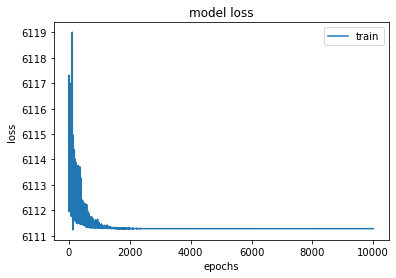

In [21]:
# original model with mse error
history = model.fit(x, y, epochs = 10000, verbose =1)

# sigmoid, sigmoid, relu
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train'],loc='upper right')
plt.show()

Epoch 1/10000
3/3 [==============================] - 1s 3ms/step - loss: 833719424.0000 - mae: 99.9938
Epoch 2/10000
3/3 [==============================] - 0s 5ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 3/10000
3/3 [==============================] - 0s 4ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 4/10000
3/3 [==============================] - 0s 4ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 5/10000
3/3 [==============================] - 0s 5ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 6/10000
3/3 [==============================] - 0s 4ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 7/10000
3/3 [==============================] - 0s 4ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 8/10000
3/3 [==============================] - 0s 4ms/step - loss: 833719488.0000 - mae: 99.9937
Epoch 9/10000
3/3 [==============================] - 0s 4ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 10/10000
3/3 [==============================] - 0s 5ms/step - loss:

3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 158/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 159/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 160/10000
3/3 [==============================] - 0s 4ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 161/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9937
Epoch 162/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9937
Epoch 163/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 164/10000
3/3 [==============================] - 0s 4ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 165/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 166/10000
3/3 [==============================] - 0s 3ms/step - lo

3/3 [==============================] - 0s 4ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 314/10000
3/3 [==============================] - 0s 4ms/step - loss: 833719616.0000 - mae: 99.9937
Epoch 315/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 316/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 317/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 318/10000
3/3 [==============================] - 0s 4ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 319/10000
3/3 [==============================] - 0s 4ms/step - loss: 833719424.0000 - mae: 99.9938
Epoch 320/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 321/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 322/10000
3/3 [==============================] - 0s 3ms/step - lo

3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 470/10000
3/3 [==============================] - 0s 4ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 471/10000
3/3 [==============================] - 0s 5ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 472/10000
3/3 [==============================] - 0s 4ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 473/10000
3/3 [==============================] - 0s 4ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 474/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9937
Epoch 475/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 476/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 477/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 478/10000
3/3 [==============================] - 0s 3ms/step - lo

3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 626/10000
3/3 [==============================] - 0s 5ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 627/10000
3/3 [==============================] - 0s 4ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 628/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 629/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 630/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9937
Epoch 631/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 632/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 633/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9937
Epoch 634/10000
3/3 [==============================] - 0s 3ms/step - lo

3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 782/10000
3/3 [==============================] - 0s 4ms/step - loss: 833719488.0000 - mae: 99.9937
Epoch 783/10000
3/3 [==============================] - 0s 4ms/step - loss: 833719488.0000 - mae: 99.9937
Epoch 784/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 785/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 786/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719424.0000 - mae: 99.9938
Epoch 787/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 788/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 789/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719616.0000 - mae: 99.9938
Epoch 790/10000
3/3 [==============================] - 0s 3ms/step - lo

3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 938/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9937
Epoch 939/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 940/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 941/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 942/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 943/10000
3/3 [==============================] - 0s 4ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 944/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 945/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719616.0000 - mae: 99.9938
Epoch 946/10000
3/3 [==============================] - 0s 3ms/step - lo

3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 1016/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 1017/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 1018/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 1019/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 1020/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719616.0000 - mae: 99.9938
Epoch 1021/10000
3/3 [==============================] - 0s 4ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 1022/10000
3/3 [==============================] - 0s 4ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 1023/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 1024/10000
3/3 [==============================] - 0s 3ms/

3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 1170/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 1171/10000
3/3 [==============================] - 0s 4ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 1172/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 1173/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9937
Epoch 1174/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 1175/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 1176/10000
3/3 [==============================] - 0s 4ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 1177/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9937
Epoch 1178/10000
3/3 [==============================] - 0s 3ms/

3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9937
Epoch 1324/10000
3/3 [==============================] - 0s 2ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 1325/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 1326/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9937
Epoch 1327/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 1328/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 1329/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 1330/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 1331/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 1332/10000
3/3 [==============================] - 0s 3ms/

3/3 [==============================] - 0s 4ms/step - loss: 833719488.0000 - mae: 99.9937
Epoch 1478/10000
3/3 [==============================] - 0s 4ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 1479/10000
3/3 [==============================] - 0s 11ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 1480/10000
3/3 [==============================] - 0s 5ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 1481/10000
3/3 [==============================] - 0s 5ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 1482/10000
3/3 [==============================] - 0s 4ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 1483/10000
3/3 [==============================] - 0s 4ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 1484/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 1485/10000
3/3 [==============================] - 0s 4ms/step - loss: 833719488.0000 - mae: 99.9937
Epoch 1486/10000
3/3 [==============================] - 0s 4ms

3/3 [==============================] - 0s 4ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 1632/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 1633/10000
3/3 [==============================] - 0s 4ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 1634/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 1635/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 1636/10000
3/3 [==============================] - 0s 4ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 1637/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9937
Epoch 1638/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9937
Epoch 1639/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9937
Epoch 1640/10000
3/3 [==============================] - 0s 3ms/

3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 1786/10000
3/3 [==============================] - 0s 4ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 1787/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 1788/10000
3/3 [==============================] - 0s 4ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 1789/10000
3/3 [==============================] - 0s 4ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 1790/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 1791/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 1792/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 1793/10000
3/3 [==============================] - 0s 4ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 1794/10000
3/3 [==============================] - 0s 3ms/

3/3 [==============================] - 0s 4ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 1940/10000
3/3 [==============================] - 0s 4ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 1941/10000
3/3 [==============================] - 0s 4ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 1942/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 1943/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 1944/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 1945/10000
3/3 [==============================] - 0s 4ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 1946/10000
3/3 [==============================] - 0s 4ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 1947/10000
3/3 [==============================] - 0s 4ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 1948/10000
3/3 [==============================] - 0s 3ms/

3/3 [==============================] - 0s 4ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 2094/10000
3/3 [==============================] - 0s 5ms/step - loss: 833719488.0000 - mae: 99.9937
Epoch 2095/10000
3/3 [==============================] - 0s 5ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 2096/10000
3/3 [==============================] - 0s 5ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 2097/10000
3/3 [==============================] - 0s 4ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 2098/10000
3/3 [==============================] - 0s 4ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 2099/10000
3/3 [==============================] - 0s 5ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 2100/10000
3/3 [==============================] - 0s 4ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 2101/10000
3/3 [==============================] - 0s 5ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 2102/10000
3/3 [==============================] - 0s 4ms/

3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 2248/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 2249/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719616.0000 - mae: 99.9938
Epoch 2250/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 2251/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 2252/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 2253/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9937
Epoch 2254/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719616.0000 - mae: 99.9937
Epoch 2255/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 2256/10000
3/3 [==============================] - 0s 3ms/

3/3 [==============================] - 0s 4ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 2402/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 2403/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 2404/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 2405/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9937
Epoch 2406/10000
3/3 [==============================] - 0s 4ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 2407/10000
3/3 [==============================] - 0s 5ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 2408/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 2409/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 2410/10000
3/3 [==============================] - 0s 3ms/

3/3 [==============================] - 0s 2ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 2556/10000
3/3 [==============================] - 0s 2ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 2557/10000
3/3 [==============================] - 0s 2ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 2558/10000
3/3 [==============================] - 0s 2ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 2559/10000
3/3 [==============================] - 0s 2ms/step - loss: 833719488.0000 - mae: 99.9937
Epoch 2560/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 2561/10000
3/3 [==============================] - 0s 2ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 2562/10000
3/3 [==============================] - 0s 2ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 2563/10000
3/3 [==============================] - 0s 2ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 2564/10000
3/3 [==============================] - 0s 2ms/

3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 2710/10000
3/3 [==============================] - 0s 4ms/step - loss: 833719488.0000 - mae: 99.9937
Epoch 2711/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9937
Epoch 2712/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 2713/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9937
Epoch 2714/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 2715/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 2716/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9937
Epoch 2717/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 2718/10000
3/3 [==============================] - 0s 3ms/

3/3 [==============================] - 0s 2ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 2864/10000
3/3 [==============================] - 0s 2ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 2865/10000
3/3 [==============================] - 0s 2ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 2866/10000
3/3 [==============================] - 0s 2ms/step - loss: 833719616.0000 - mae: 99.9938
Epoch 2867/10000
3/3 [==============================] - 0s 2ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 2868/10000
3/3 [==============================] - 0s 4ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 2869/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719424.0000 - mae: 99.9938
Epoch 2870/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 2871/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9937
Epoch 2872/10000
3/3 [==============================] - 0s 5ms/

3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9937
Epoch 3018/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 3019/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 3020/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 3021/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 3022/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 3023/10000
3/3 [==============================] - 0s 4ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 3024/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 3025/10000
3/3 [==============================] - 0s 4ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 3026/10000
3/3 [==============================] - 0s 5ms/

3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 3172/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 3173/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 3174/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 3175/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 3176/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 3177/10000
3/3 [==============================] - 0s 2ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 3178/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9937
Epoch 3179/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 3180/10000
3/3 [==============================] - 0s 3ms/

3/3 [==============================] - 0s 3ms/step - loss: 833719616.0000 - mae: 99.9938
Epoch 3326/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 3327/10000
3/3 [==============================] - 0s 2ms/step - loss: 833719488.0000 - mae: 99.9937
Epoch 3328/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 3329/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 3330/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 3331/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 3332/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 3333/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 3334/10000
3/3 [==============================] - 0s 3ms/

3/3 [==============================] - 0s 4ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 3480/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 3481/10000
3/3 [==============================] - 0s 4ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 3482/10000
3/3 [==============================] - 0s 4ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 3483/10000
3/3 [==============================] - 0s 5ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 3484/10000
3/3 [==============================] - 0s 4ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 3485/10000
3/3 [==============================] - 0s 4ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 3486/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 3487/10000
3/3 [==============================] - 0s 4ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 3488/10000
3/3 [==============================] - 0s 3ms/

3/3 [==============================] - 0s 5ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 3634/10000
3/3 [==============================] - 0s 5ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 3635/10000
3/3 [==============================] - 0s 4ms/step - loss: 833719424.0000 - mae: 99.9937
Epoch 3636/10000
3/3 [==============================] - 0s 5ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 3637/10000
3/3 [==============================] - 0s 4ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 3638/10000
3/3 [==============================] - 0s 4ms/step - loss: 833719616.0000 - mae: 99.9938
Epoch 3639/10000
3/3 [==============================] - 0s 4ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 3640/10000
3/3 [==============================] - 0s 5ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 3641/10000
3/3 [==============================] - 0s 5ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 3642/10000
3/3 [==============================] - 0s 5ms/

3/3 [==============================] - 0s 6ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 3788/10000
3/3 [==============================] - 0s 4ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 3789/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 3790/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 3791/10000
3/3 [==============================] - 0s 4ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 3792/10000
3/3 [==============================] - 0s 4ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 3793/10000
3/3 [==============================] - 0s 4ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 3794/10000
3/3 [==============================] - 0s 4ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 3795/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 3796/10000
3/3 [==============================] - 0s 4ms/

3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 3942/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 3943/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 3944/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 3945/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 3946/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 3947/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 3948/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 3949/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 3950/10000
3/3 [==============================] - 0s 3ms/

3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 4096/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 4097/10000
3/3 [==============================] - 0s 4ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 4098/10000
3/3 [==============================] - 0s 4ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 4099/10000
3/3 [==============================] - 0s 4ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 4100/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9937
Epoch 4101/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 4102/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 4103/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 4104/10000
3/3 [==============================] - 0s 3ms/

3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9937
Epoch 4250/10000
3/3 [==============================] - 0s 2ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 4251/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9937
Epoch 4252/10000
3/3 [==============================] - 0s 2ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 4253/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 4254/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 4255/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 4256/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 4257/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9937
Epoch 4258/10000
3/3 [==============================] - 0s 3ms/

3/3 [==============================] - 0s 4ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 4404/10000
3/3 [==============================] - 0s 4ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 4405/10000
3/3 [==============================] - 0s 5ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 4406/10000
3/3 [==============================] - 0s 4ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 4407/10000
3/3 [==============================] - 0s 4ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 4408/10000
3/3 [==============================] - 0s 5ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 4409/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 4410/10000
3/3 [==============================] - 0s 6ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 4411/10000
3/3 [==============================] - 0s 4ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 4412/10000
3/3 [==============================] - 0s 4ms/

3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 4558/10000
3/3 [==============================] - 0s 4ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 4559/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 4560/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 4561/10000
3/3 [==============================] - 0s 4ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 4562/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 4563/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 4564/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 4565/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 4566/10000
3/3 [==============================] - 0s 3ms/

3/3 [==============================] - 0s 4ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 4712/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 4713/10000
3/3 [==============================] - 0s 4ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 4714/10000
3/3 [==============================] - 0s 4ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 4715/10000
3/3 [==============================] - 0s 5ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 4716/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 4717/10000
3/3 [==============================] - 0s 4ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 4718/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 4719/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 4720/10000
3/3 [==============================] - 0s 4ms/

3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 4866/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 4867/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 4868/10000
3/3 [==============================] - 0s 4ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 4869/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 4870/10000
3/3 [==============================] - 0s 4ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 4871/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 4872/10000
3/3 [==============================] - 0s 4ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 4873/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 4874/10000
3/3 [==============================] - 0s 4ms/

3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 5020/10000
3/3 [==============================] - 0s 4ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 5021/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 5022/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 5023/10000
3/3 [==============================] - 0s 4ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 5024/10000
3/3 [==============================] - 0s 4ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 5025/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 5026/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 5027/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 5028/10000
3/3 [==============================] - 0s 4ms/

3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 5174/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 5175/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 5176/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 5177/10000
3/3 [==============================] - 0s 2ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 5178/10000
3/3 [==============================] - 0s 2ms/step - loss: 833719424.0000 - mae: 99.9938
Epoch 5179/10000
3/3 [==============================] - 0s 2ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 5180/10000
3/3 [==============================] - 0s 2ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 5181/10000
3/3 [==============================] - 0s 2ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 5182/10000
3/3 [==============================] - 0s 2ms/

3/3 [==============================] - 0s 2ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 5328/10000
3/3 [==============================] - 0s 2ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 5329/10000
3/3 [==============================] - 0s 2ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 5330/10000
3/3 [==============================] - 0s 2ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 5331/10000
3/3 [==============================] - 0s 2ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 5332/10000
3/3 [==============================] - 0s 2ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 5333/10000
3/3 [==============================] - 0s 2ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 5334/10000
3/3 [==============================] - 0s 2ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 5335/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 5336/10000
3/3 [==============================] - 0s 3ms/

3/3 [==============================] - 0s 2ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 5482/10000
3/3 [==============================] - 0s 2ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 5483/10000
3/3 [==============================] - 0s 2ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 5484/10000
3/3 [==============================] - 0s 2ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 5485/10000
3/3 [==============================] - 0s 2ms/step - loss: 833719488.0000 - mae: 99.9937
Epoch 5486/10000
3/3 [==============================] - 0s 2ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 5487/10000
3/3 [==============================] - 0s 2ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 5488/10000
3/3 [==============================] - 0s 2ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 5489/10000
3/3 [==============================] - 0s 2ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 5490/10000
3/3 [==============================] - 0s 2ms/

3/3 [==============================] - 0s 2ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 5636/10000
3/3 [==============================] - 0s 2ms/step - loss: 833719488.0000 - mae: 99.9937
Epoch 5637/10000
3/3 [==============================] - 0s 2ms/step - loss: 833719488.0000 - mae: 99.9937
Epoch 5638/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 5639/10000
3/3 [==============================] - 0s 2ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 5640/10000
3/3 [==============================] - 0s 2ms/step - loss: 833719488.0000 - mae: 99.9937
Epoch 5641/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 5642/10000
3/3 [==============================] - 0s 2ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 5643/10000
3/3 [==============================] - 0s 2ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 5644/10000
3/3 [==============================] - 0s 2ms/

3/3 [==============================] - 0s 2ms/step - loss: 833719616.0000 - mae: 99.9938
Epoch 5790/10000
3/3 [==============================] - 0s 2ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 5791/10000
3/3 [==============================] - 0s 2ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 5792/10000
3/3 [==============================] - 0s 2ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 5793/10000
3/3 [==============================] - 0s 2ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 5794/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9937
Epoch 5795/10000
3/3 [==============================] - 0s 2ms/step - loss: 833719488.0000 - mae: 99.9937
Epoch 5796/10000
3/3 [==============================] - 0s 2ms/step - loss: 833719488.0000 - mae: 99.9937
Epoch 5797/10000
3/3 [==============================] - 0s 2ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 5798/10000
3/3 [==============================] - 0s 2ms/

3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 5944/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719616.0000 - mae: 99.9937
Epoch 5945/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 5946/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 5947/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9937
Epoch 5948/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 5949/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9937
Epoch 5950/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9937
Epoch 5951/10000
3/3 [==============================] - 0s 4ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 5952/10000
3/3 [==============================] - 0s 3ms/

3/3 [==============================] - 0s 2ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 6098/10000
3/3 [==============================] - 0s 2ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 6099/10000
3/3 [==============================] - 0s 2ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 6100/10000
3/3 [==============================] - 0s 2ms/step - loss: 833719488.0000 - mae: 99.9937
Epoch 6101/10000
3/3 [==============================] - 0s 2ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 6102/10000
3/3 [==============================] - 0s 2ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 6103/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 6104/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 6105/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 6106/10000
3/3 [==============================] - 0s 2ms/

3/3 [==============================] - 0s 2ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 6252/10000
3/3 [==============================] - 0s 2ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 6253/10000
3/3 [==============================] - 0s 2ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 6254/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 6255/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 6256/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 6257/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 6258/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 6259/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9937
Epoch 6260/10000
3/3 [==============================] - 0s 2ms/

3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 6406/10000
3/3 [==============================] - 0s 4ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 6407/10000
3/3 [==============================] - 0s 4ms/step - loss: 833719488.0000 - mae: 99.9937
Epoch 6408/10000
3/3 [==============================] - 0s 5ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 6409/10000
3/3 [==============================] - 0s 4ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 6410/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 6411/10000
3/3 [==============================] - 0s 4ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 6412/10000
3/3 [==============================] - 0s 4ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 6413/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9937
Epoch 6414/10000
3/3 [==============================] - 0s 5ms/

3/3 [==============================] - 0s 2ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 6560/10000
3/3 [==============================] - 0s 2ms/step - loss: 833719488.0000 - mae: 99.9937
Epoch 6561/10000
3/3 [==============================] - 0s 2ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 6562/10000
3/3 [==============================] - 0s 2ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 6563/10000
3/3 [==============================] - 0s 2ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 6564/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 6565/10000
3/3 [==============================] - 0s 2ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 6566/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 6567/10000
3/3 [==============================] - 0s 2ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 6568/10000
3/3 [==============================] - 0s 2ms/

3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 6714/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 6715/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 6716/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 6717/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 6718/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9937
Epoch 6719/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 6720/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 6721/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 6722/10000
3/3 [==============================] - 0s 3ms/

3/3 [==============================] - 0s 5ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 6868/10000
3/3 [==============================] - 0s 4ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 6869/10000
3/3 [==============================] - 0s 4ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 6870/10000
3/3 [==============================] - 0s 4ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 6871/10000
3/3 [==============================] - 0s 4ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 6872/10000
3/3 [==============================] - 0s 4ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 6873/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 6874/10000
3/3 [==============================] - 0s 4ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 6875/10000
3/3 [==============================] - 0s 5ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 6876/10000
3/3 [==============================] - 0s 3ms/

3/3 [==============================] - 0s 2ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 7022/10000
3/3 [==============================] - 0s 2ms/step - loss: 833719488.0000 - mae: 99.9937
Epoch 7023/10000
3/3 [==============================] - 0s 2ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 7024/10000
3/3 [==============================] - 0s 2ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 7025/10000
3/3 [==============================] - 0s 2ms/step - loss: 833719488.0000 - mae: 99.9937
Epoch 7026/10000
3/3 [==============================] - 0s 2ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 7027/10000
3/3 [==============================] - 0s 2ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 7028/10000
3/3 [==============================] - 0s 2ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 7029/10000
3/3 [==============================] - 0s 2ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 7030/10000
3/3 [==============================] - 0s 3ms/

3/3 [==============================] - 0s 2ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 7176/10000
3/3 [==============================] - 0s 2ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 7177/10000
3/3 [==============================] - 0s 2ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 7178/10000
3/3 [==============================] - 0s 2ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 7179/10000
3/3 [==============================] - 0s 2ms/step - loss: 833719616.0000 - mae: 99.9938
Epoch 7180/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719616.0000 - mae: 99.9938
Epoch 7181/10000
3/3 [==============================] - 0s 2ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 7182/10000
3/3 [==============================] - 0s 2ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 7183/10000
3/3 [==============================] - 0s 2ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 7184/10000
3/3 [==============================] - 0s 2ms/

3/3 [==============================] - 0s 4ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 7330/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 7331/10000
3/3 [==============================] - 0s 4ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 7332/10000
3/3 [==============================] - 0s 4ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 7333/10000
3/3 [==============================] - 0s 4ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 7334/10000
3/3 [==============================] - 0s 4ms/step - loss: 833719488.0000 - mae: 99.9937
Epoch 7335/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 7336/10000
3/3 [==============================] - 0s 4ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 7337/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 7338/10000
3/3 [==============================] - 0s 3ms/

3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 7484/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 7485/10000
3/3 [==============================] - 0s 2ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 7486/10000
3/3 [==============================] - 0s 2ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 7487/10000
3/3 [==============================] - 0s 2ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 7488/10000
3/3 [==============================] - 0s 2ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 7489/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 7490/10000
3/3 [==============================] - 0s 2ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 7491/10000
3/3 [==============================] - 0s 2ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 7492/10000
3/3 [==============================] - 0s 2ms/

3/3 [==============================] - 0s 2ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 7638/10000
3/3 [==============================] - 0s 2ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 7639/10000
3/3 [==============================] - 0s 2ms/step - loss: 833719488.0000 - mae: 99.9937
Epoch 7640/10000
3/3 [==============================] - 0s 2ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 7641/10000
3/3 [==============================] - 0s 2ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 7642/10000
3/3 [==============================] - 0s 2ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 7643/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9937
Epoch 7644/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9937
Epoch 7645/10000
3/3 [==============================] - 0s 4ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 7646/10000
3/3 [==============================] - 0s 3ms/

3/3 [==============================] - 0s 2ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 7792/10000
3/3 [==============================] - 0s 2ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 7793/10000
3/3 [==============================] - 0s 2ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 7794/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 7795/10000
3/3 [==============================] - 0s 2ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 7796/10000
3/3 [==============================] - 0s 2ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 7797/10000
3/3 [==============================] - 0s 2ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 7798/10000
3/3 [==============================] - 0s 2ms/step - loss: 833719488.0000 - mae: 99.9937
Epoch 7799/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 7800/10000
3/3 [==============================] - 0s 3ms/

3/3 [==============================] - 0s 2ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 7946/10000
3/3 [==============================] - 0s 2ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 7947/10000
3/3 [==============================] - 0s 2ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 7948/10000
3/3 [==============================] - 0s 2ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 7949/10000
3/3 [==============================] - 0s 2ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 7950/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 7951/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 7952/10000
3/3 [==============================] - 0s 2ms/step - loss: 833719488.0000 - mae: 99.9937
Epoch 7953/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 7954/10000
3/3 [==============================] - 0s 3ms/

3/3 [==============================] - 0s 2ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 8100/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 8101/10000
3/3 [==============================] - 0s 2ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 8102/10000
3/3 [==============================] - 0s 2ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 8103/10000
3/3 [==============================] - 0s 2ms/step - loss: 833719488.0000 - mae: 99.9937
Epoch 8104/10000
3/3 [==============================] - 0s 2ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 8105/10000
3/3 [==============================] - 0s 2ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 8106/10000
3/3 [==============================] - 0s 2ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 8107/10000
3/3 [==============================] - 0s 2ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 8108/10000
3/3 [==============================] - 0s 2ms/

3/3 [==============================] - 0s 2ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 8254/10000
3/3 [==============================] - 0s 2ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 8255/10000
3/3 [==============================] - 0s 2ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 8256/10000
3/3 [==============================] - 0s 2ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 8257/10000
3/3 [==============================] - 0s 2ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 8258/10000
3/3 [==============================] - 0s 2ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 8259/10000
3/3 [==============================] - 0s 2ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 8260/10000
3/3 [==============================] - 0s 2ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 8261/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 8262/10000
3/3 [==============================] - 0s 3ms/

3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 8408/10000
3/3 [==============================] - 0s 2ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 8409/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 8410/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 8411/10000
3/3 [==============================] - 0s 2ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 8412/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 8413/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 8414/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 8415/10000
3/3 [==============================] - 0s 2ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 8416/10000
3/3 [==============================] - 0s 3ms/

3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 8562/10000
3/3 [==============================] - 0s 2ms/step - loss: 833719488.0000 - mae: 99.9937
Epoch 8563/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 8564/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 8565/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 8566/10000
3/3 [==============================] - 0s 2ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 8567/10000
3/3 [==============================] - 0s 2ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 8568/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9937
Epoch 8569/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719616.0000 - mae: 99.9938
Epoch 8570/10000
3/3 [==============================] - 0s 3ms/

3/3 [==============================] - 0s 2ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 8716/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719616.0000 - mae: 99.9938
Epoch 8717/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 8718/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 8719/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 8720/10000
3/3 [==============================] - 0s 2ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 8721/10000
3/3 [==============================] - 0s 2ms/step - loss: 833719488.0000 - mae: 99.9937
Epoch 8722/10000
3/3 [==============================] - 0s 2ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 8723/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9937
Epoch 8724/10000
3/3 [==============================] - 0s 3ms/

3/3 [==============================] - 0s 4ms/step - loss: 833719488.0000 - mae: 99.9937
Epoch 8870/10000
3/3 [==============================] - 0s 4ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 8871/10000
3/3 [==============================] - 0s 4ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 8872/10000
3/3 [==============================] - 0s 4ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 8873/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 8874/10000
3/3 [==============================] - 0s 4ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 8875/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 8876/10000
3/3 [==============================] - 0s 4ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 8877/10000
3/3 [==============================] - 0s 4ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 8878/10000
3/3 [==============================] - 0s 4ms/

3/3 [==============================] - 0s 4ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 9024/10000
3/3 [==============================] - 0s 4ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 9025/10000
3/3 [==============================] - 0s 4ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 9026/10000
3/3 [==============================] - 0s 4ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 9027/10000
3/3 [==============================] - 0s 4ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 9028/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 9029/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 9030/10000
3/3 [==============================] - 0s 4ms/step - loss: 833719488.0000 - mae: 99.9937
Epoch 9031/10000
3/3 [==============================] - 0s 4ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 9032/10000
3/3 [==============================] - 0s 3ms/

3/3 [==============================] - 0s 2ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 9178/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9937
Epoch 9179/10000
3/3 [==============================] - 0s 2ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 9180/10000
3/3 [==============================] - 0s 2ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 9181/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 9182/10000
3/3 [==============================] - 0s 2ms/step - loss: 833719488.0000 - mae: 99.9937
Epoch 9183/10000
3/3 [==============================] - 0s 2ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 9184/10000
3/3 [==============================] - 0s 2ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 9185/10000
3/3 [==============================] - 0s 2ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 9186/10000
3/3 [==============================] - 0s 2ms/

3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 9332/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 9333/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9937
Epoch 9334/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 9335/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 9336/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 9337/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 9338/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 9339/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 9340/10000
3/3 [==============================] - 0s 3ms/

3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 9486/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 9487/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719616.0000 - mae: 99.9938
Epoch 9488/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 9489/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 9490/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 9491/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 9492/10000
3/3 [==============================] - 0s 2ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 9493/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 9494/10000
3/3 [==============================] - 0s 3ms/

3/3 [==============================] - 0s 2ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 9640/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 9641/10000
3/3 [==============================] - 0s 2ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 9642/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9937
Epoch 9643/10000
3/3 [==============================] - 0s 2ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 9644/10000
3/3 [==============================] - 0s 2ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 9645/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 9646/10000
3/3 [==============================] - 0s 2ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 9647/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9937
Epoch 9648/10000
3/3 [==============================] - 0s 2ms/

3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 9794/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 9795/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 9796/10000
3/3 [==============================] - 0s 4ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 9797/10000
3/3 [==============================] - 0s 4ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 9798/10000
3/3 [==============================] - 0s 4ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 9799/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 9800/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9937
Epoch 9801/10000
3/3 [==============================] - 0s 3ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 9802/10000
3/3 [==============================] - 0s 4ms/

3/3 [==============================] - 0s 2ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 9948/10000
3/3 [==============================] - 0s 2ms/step - loss: 833719488.0000 - mae: 99.9937
Epoch 9949/10000
3/3 [==============================] - 0s 2ms/step - loss: 833719488.0000 - mae: 99.9937
Epoch 9950/10000
3/3 [==============================] - 0s 2ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 9951/10000
3/3 [==============================] - 0s 2ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 9952/10000
3/3 [==============================] - 0s 2ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 9953/10000
3/3 [==============================] - 0s 2ms/step - loss: 833719488.0000 - mae: 99.9937
Epoch 9954/10000
3/3 [==============================] - 0s 2ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 9955/10000
3/3 [==============================] - 0s 2ms/step - loss: 833719488.0000 - mae: 99.9938
Epoch 9956/10000
3/3 [==============================] - 0s 2ms/

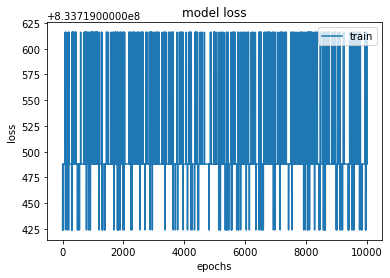

In [29]:
# custom loss function
def focal_loss(y_true, y_pred):
  custom_loss = tf.reduce_mean(tf.square(tf.square(y_true - y_pred)), axis = -1)
  return custom_loss    

model_.compile(loss=focal_loss,
          optimizer='adam',
          metrics=['mae'])

# original model
history = model_.fit(x, y, epochs = 10000, verbose =1)

# sigmoid, sigmoid, relu
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train'],loc='upper right')
plt.show()

In [16]:
# new model
history = model.fit(x, y, epochs = 1000, verbose =1)

Epoch 1/1000
3/3 [==============================] - 0s 3ms/step - loss: 6174.7480 - mae: 63.5277
Epoch 2/1000
3/3 [==============================] - 0s 4ms/step - loss: 6201.3794 - mae: 63.7589
Epoch 3/1000
3/3 [==============================] - 0s 4ms/step - loss: 6151.9243 - mae: 64.0150
Epoch 4/1000
3/3 [==============================] - 0s 4ms/step - loss: 6186.7241 - mae: 64.7256
Epoch 5/1000
3/3 [==============================] - 0s 4ms/step - loss: 6200.8359 - mae: 65.0014
Epoch 6/1000
3/3 [==============================] - 0s 4ms/step - loss: 6259.3818 - mae: 64.2367
Epoch 7/1000
3/3 [==============================] - 0s 4ms/step - loss: 6128.2734 - mae: 63.6722
Epoch 8/1000
3/3 [==============================] - 0s 3ms/step - loss: 6141.3335 - mae: 64.5277
Epoch 9/1000
3/3 [==============================] - 0s 3ms/step - loss: 6163.3706 - mae: 64.9407
Epoch 10/1000
3/3 [==============================] - 0s 4ms/step - loss: 6176.0771 - mae: 64.9430
Epoch 11/1000
3/3 [==========

3/3 [==============================] - 0s 4ms/step - loss: 6144.1680 - mae: 64.4179
Epoch 168/1000
3/3 [==============================] - 0s 5ms/step - loss: 6113.9722 - mae: 63.9928
Epoch 169/1000
3/3 [==============================] - 0s 4ms/step - loss: 6152.2168 - mae: 63.7084
Epoch 170/1000
3/3 [==============================] - 0s 5ms/step - loss: 6145.7979 - mae: 63.5565
Epoch 171/1000
3/3 [==============================] - 0s 4ms/step - loss: 6140.3569 - mae: 63.6855
Epoch 172/1000
3/3 [==============================] - 0s 3ms/step - loss: 6116.8442 - mae: 63.7102
Epoch 173/1000
3/3 [==============================] - 0s 4ms/step - loss: 6140.4097 - mae: 64.3051
Epoch 174/1000
3/3 [==============================] - 0s 3ms/step - loss: 6126.9395 - mae: 64.4411
Epoch 175/1000
3/3 [==============================] - 0s 3ms/step - loss: 6131.7446 - mae: 64.4924
Epoch 176/1000
3/3 [==============================] - 0s 3ms/step - loss: 6161.5127 - mae: 64.4237
Epoch 177/1000
3/3 [=====

3/3 [==============================] - 0s 5ms/step - loss: 6120.3223 - mae: 63.9583
Epoch 332/1000
3/3 [==============================] - 0s 4ms/step - loss: 6124.4312 - mae: 63.9100
Epoch 333/1000
3/3 [==============================] - 0s 4ms/step - loss: 6153.9346 - mae: 64.1856
Epoch 334/1000
3/3 [==============================] - 0s 4ms/step - loss: 6127.3638 - mae: 64.0965
Epoch 335/1000
3/3 [==============================] - 0s 3ms/step - loss: 6131.5923 - mae: 63.9236
Epoch 336/1000
3/3 [==============================] - 0s 3ms/step - loss: 6132.2188 - mae: 63.8657
Epoch 337/1000
3/3 [==============================] - 0s 4ms/step - loss: 6121.4541 - mae: 63.9193
Epoch 338/1000
3/3 [==============================] - 0s 3ms/step - loss: 6123.5137 - mae: 63.9012
Epoch 339/1000
3/3 [==============================] - 0s 3ms/step - loss: 6149.7686 - mae: 63.9212
Epoch 340/1000
3/3 [==============================] - 0s 3ms/step - loss: 6122.6055 - mae: 63.7546
Epoch 341/1000
3/3 [=====

3/3 [==============================] - 0s 4ms/step - loss: 6116.9248 - mae: 64.2381
Epoch 496/1000
3/3 [==============================] - 0s 3ms/step - loss: 6118.5859 - mae: 64.2384
Epoch 497/1000
3/3 [==============================] - 0s 4ms/step - loss: 6130.0942 - mae: 64.2071
Epoch 498/1000
3/3 [==============================] - 0s 3ms/step - loss: 6117.8735 - mae: 64.0548
Epoch 499/1000
3/3 [==============================] - 0s 3ms/step - loss: 6121.6333 - mae: 64.0946
Epoch 500/1000
3/3 [==============================] - 0s 3ms/step - loss: 6157.5820 - mae: 64.1508
Epoch 501/1000
3/3 [==============================] - 0s 4ms/step - loss: 6121.0547 - mae: 63.8109
Epoch 502/1000
3/3 [==============================] - 0s 3ms/step - loss: 6119.0146 - mae: 63.8562
Epoch 503/1000
3/3 [==============================] - 0s 3ms/step - loss: 6117.6230 - mae: 63.9440
Epoch 504/1000
3/3 [==============================] - 0s 3ms/step - loss: 6147.7598 - mae: 64.2769
Epoch 505/1000
3/3 [=====

3/3 [==============================] - 0s 5ms/step - loss: 6115.1318 - mae: 63.9090
Epoch 660/1000
3/3 [==============================] - 0s 4ms/step - loss: 6114.5112 - mae: 63.8789
Epoch 661/1000
3/3 [==============================] - 0s 7ms/step - loss: 6114.7139 - mae: 63.8671
Epoch 662/1000
3/3 [==============================] - 0s 4ms/step - loss: 6114.5669 - mae: 63.8787
Epoch 663/1000
3/3 [==============================] - 0s 4ms/step - loss: 6119.4722 - mae: 63.9033
Epoch 664/1000
3/3 [==============================] - 0s 3ms/step - loss: 6114.0342 - mae: 63.8596
Epoch 665/1000
3/3 [==============================] - 0s 3ms/step - loss: 6114.6099 - mae: 63.9208
Epoch 666/1000
3/3 [==============================] - 0s 3ms/step - loss: 6114.8853 - mae: 63.9517
Epoch 667/1000
3/3 [==============================] - 0s 3ms/step - loss: 6116.9932 - mae: 63.9702
Epoch 668/1000
3/3 [==============================] - 0s 3ms/step - loss: 6114.4473 - mae: 63.9671
Epoch 669/1000
3/3 [=====

3/3 [==============================] - 0s 3ms/step - loss: 6115.4058 - mae: 63.8449
Epoch 824/1000
3/3 [==============================] - 0s 3ms/step - loss: 6115.6528 - mae: 63.8920
Epoch 825/1000
3/3 [==============================] - 0s 3ms/step - loss: 6114.3721 - mae: 63.9235
Epoch 826/1000
3/3 [==============================] - 0s 3ms/step - loss: 6112.6792 - mae: 63.9300
Epoch 827/1000
3/3 [==============================] - 0s 3ms/step - loss: 6112.8403 - mae: 63.9203
Epoch 828/1000
3/3 [==============================] - 0s 3ms/step - loss: 6113.1519 - mae: 63.9105
Epoch 829/1000
3/3 [==============================] - 0s 3ms/step - loss: 6114.8486 - mae: 63.8993
Epoch 830/1000
3/3 [==============================] - 0s 3ms/step - loss: 6112.3999 - mae: 63.8712
Epoch 831/1000
3/3 [==============================] - 0s 3ms/step - loss: 6117.1729 - mae: 63.8695
Epoch 832/1000
3/3 [==============================] - 0s 3ms/step - loss: 6114.1812 - mae: 63.8502
Epoch 833/1000
3/3 [=====

3/3 [==============================] - 0s 3ms/step - loss: 6112.7949 - mae: 63.9556
Epoch 988/1000
3/3 [==============================] - 0s 3ms/step - loss: 6112.4541 - mae: 63.9368
Epoch 989/1000
3/3 [==============================] - 0s 3ms/step - loss: 6113.8867 - mae: 63.9285
Epoch 990/1000
3/3 [==============================] - 0s 3ms/step - loss: 6112.3042 - mae: 63.9348
Epoch 991/1000
3/3 [==============================] - 0s 4ms/step - loss: 6112.9443 - mae: 63.9515
Epoch 992/1000
3/3 [==============================] - 0s 4ms/step - loss: 6113.9116 - mae: 63.9624
Epoch 993/1000
3/3 [==============================] - 0s 3ms/step - loss: 6112.5522 - mae: 63.9624
Epoch 994/1000
3/3 [==============================] - 0s 3ms/step - loss: 6113.4424 - mae: 63.9506
Epoch 995/1000
3/3 [==============================] - 0s 3ms/step - loss: 6112.6245 - mae: 63.9329
Epoch 996/1000
3/3 [==============================] - 0s 4ms/step - loss: 6114.0278 - mae: 63.9181
Epoch 997/1000
3/3 [=====

**plotting graphs**

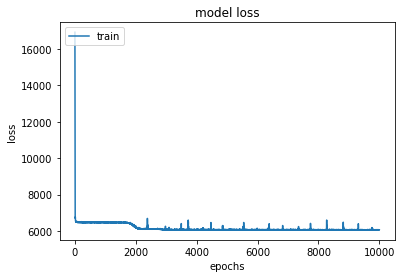

In [ ]:
# tanh, exponential, sigmoid, relu
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train'],loc='upper left')
plt.show()

In [ ]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train'],loc='upper left')
plt.show()

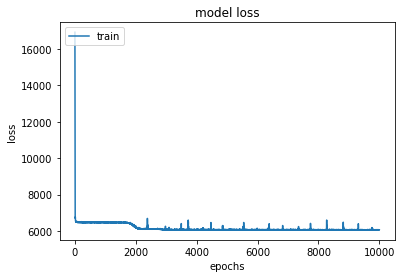

In [ ]:
# sigmoid*2, relu, sgd
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train'],loc='upper left')
plt.show()

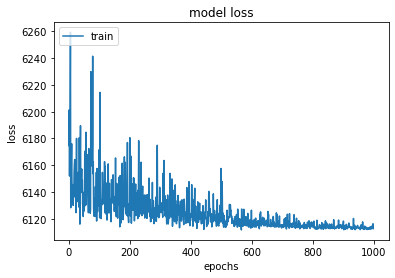

In [17]:
# all relu, loss= logcosh, (37,29), adam
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train'],loc='upper left')
plt.show()

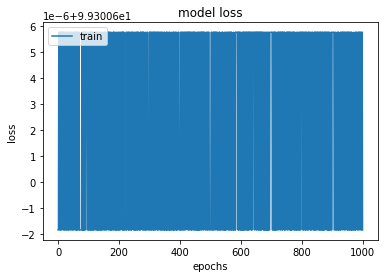

In [ ]:
# all relu, loss= logcosh, (37,29), adam
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train'],loc='upper left')
plt.show()

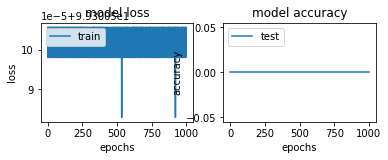

In [ ]:
# all relu, loss= logcosh, (37,29), adam
fig = plt.figure(1)
plt.subplot(2,2,1)
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train'],loc='upper left')

plt.subplot(2,2,2)
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['test'],loc='upper left')

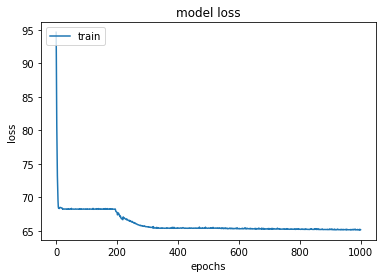

In [ ]:
# tanh*2, relu, loss= logcosh, (37,29), adam
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train'],loc='upper left')
plt.show()

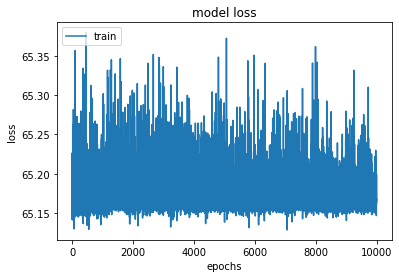

In [ ]:
# all relu, loss= logcosh, (37,29), adam, epochs = 1e4
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train'],loc='upper left')
plt.show()

In [ ]:
input_dim = 14
batch_size = 1000
nb_epoch = 50
lrelu = LeakyReLU(alpha = 0.1)

model = Sequential()
model.add(Dense(126, input_dim=input_dim)) #Dense(output_dim(also hidden wight), input_dim = input_dim)
model.add(lrelu) #Activation

model.add(Dense(252))
model.add(lrelu)
model.add(Dense(1))
model.add(Activation('linear'))

model.compile(loss= 'mean_squared_error', optimizer='Adam', metrics=['accuracy'])
model.summary()
history = model.fit(X_train_1, y_train_1[:,0:1],
                    batch_size=batch_size,
                    nb_epoch=nb_epoch,
                    verbose=1,
                    validation_split=0.2)

loss = history.history.get('loss')
acc = history.history.get('acc')
val_loss = history.history.get('val_loss')
val_acc = history.history.get('val_acc')

'''saving model'''
from keras.models import load_model
model.save('XXXXX')
del model

'''loading model'''
model = load_model('XXXXX')

'''prediction'''
pred = model.predict(X_train_1, batch_size, verbose=1)
ans = [np.argmax(r) for r in y_train_1[:,0:1]]

I ran into a similar problem, after trying all the suggestions and none of them working, I figured something must be wrong somewhere else.

After looking at my data distribution, I realized that I was not shuffling my data. So my training data was the majority of one class and my testing data was 100% another class. After shuffling the data the accuracy was no longer 0.0000e+00, it was something more meaningful.

**Regression model**

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
tf.random.set_seed(42)
model_1 = Sequential()
model_1.add(Dense(37, activation='sigmoid', kernel_initializer='he_normal', input_shape=(8,)))
model_1.add(Dense(19, activation='sigmoid', kernel_initializer='he_normal'))
model_1.add(Dense(1, activation='relu'))
model_1.compile( loss = 'mse',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])
model_1.fit(x, y, epochs = 100, verbose = 0)

In [ ]:
model_1.fit(x, y, epochs = 100)

**custom made cost function**

In [ ]:
# predictions
preds = model_1.predict(x1)

In [ ]:
# plotting
def plot_preds(traindata = x,
               trainlabels = y,
               testdata = x1,
               testlabels = y1,
               predictions = preds):
  plt.figure(figsize=(12,6))
  plt.scatter(traindata, trainlabels, c="b", label="Training data")
  plt.scatter(testdata, testlabels, c="g", label="Testing data")
  plt.scatter(testdata, predictions, c="r", label="Predictions")
  plt.legend()
  plt.show()

In [ ]:
def cf(x,y):
  p = model_1.predict(x)
  n = np.shape(y)[0]
  p = np.reshpae(p,(n,1))
  y = np.reshpae(y,(n,1))
  d = abs(p-y)
  return np.mean(d**4)

CF = lambda p: cf(p,y)

In [ ]:
results = tfp.optimizer.lbfgs_minimize(CF,initial_position=tf.constant(start),tolerance=tolerance)

ValueError: ignored